In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
GastricResults = pd.read_csv("total_GastricCancer_results_SVM.csv")

In [34]:
GastricResults

,Patient to be predicted/left out,Poor Survival Subpopulation,Moderate Survival Subpopulation,Good Survival Subpopulation,Predicted Survivability,Surv(months),Survival Status,Number of Clusters,SAM Features for each tSNE run on new subset
0,1,81.48,12.49,6.03,Poor,34.23,0,5,"Significant Features : m/z = [7009, 3516, 3482..."
1,2,0.14,73.33,26.52,High,0.67,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
2,3,9.73,4.98,85.29,High,0.43,0,6,"Significant Features : m/z = [3409, 3374, 3445..."
3,4,29.78,46.67,23.56,Moderate,45.00,0,4,"Significant Features : m/z = [3374, 3445, 3409..."
4,5,43.66,36.75,19.59,Moderate,33.53,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
...,...,...,...,...,...,...,...,...,...
58,59,77.69,1.41,20.90,Poor,20.77,1,3,"Significant Features : m/z = [3445, 3374, 3409..."
59,60,54.12,27.06,18.82,Poor,0.30,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
60,61,50.77,46.05,3.18,Poor,2.67,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
61,62,49.26,16.12,34.62,Moderate,0.47,1,4,"Significant Features : m/z = [3374, 3445, 3409..."


In [35]:
# GastricResults_ref = pd.read_excel("C:/Users/omars/Desktop/model_results_reference - Copy.xls")
# Poor_reference = GastricResults_ref["Poor Survival Subpopulation"].to_numpy()
# predictions = []
# for i in Poor_reference:
#     if i <= 10:
#         predictions.append("High")
#     elif i > 10 and i <= 50:
#         predictions.append("Moderate")
#     elif i > 50:
#         predictions.append("Poor")

# GastricResults_ref["Predicted Survivability"] = predictions
# GastricResults = GastricResults_ref

In [36]:
Significant_Proteins = GastricResults["SAM Features for each tSNE run on new subset"].to_numpy()

In [37]:
# Consider any patient with above 90% moderate population as moderate
GastricResults[GastricResults["Moderate Survival Subpopulation"] >= 90]

,Patient to be predicted/left out,Poor Survival Subpopulation,Moderate Survival Subpopulation,Good Survival Subpopulation,Predicted Survivability,Surv(months),Survival Status,Number of Clusters,SAM Features for each tSNE run on new subset
6,7,0.00,100.00,0.00,High,1.57,0,4,"Significant Features : m/z = [3374, 3445, 3409..."
10,11,0.00,98.70,1.30,High,54.17,0,5,"Significant Features : m/z = [3374, 3445, 3409..."
17,18,0.00,100.00,0.00,High,0.57,1,5,"Significant Features : m/z = [3445, 3374, 3711..."
19,20,1.79,98.21,0.00,High,1.87,0,4,"Significant Features : m/z = [3374, 3445, 3409..."
29,30,0.34,98.80,0.86,High,12.93,0,4,"Significant Features : m/z = [3374, 3445, 3409..."
44,45,3.78,96.22,0.00,High,14.33,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
45,46,0.23,96.78,2.99,High,6.10,1,4,"Significant Features : m/z = [3374, 3445, 3409..."


In [38]:
mask = GastricResults["Moderate Survival Subpopulation"] >= 90
column_name = 'Predicted Survivability'
GastricResults.loc[mask, column_name] = "Moderate"

In [39]:
Significant_proteins_values_list = [ ]
for i in range(len(Significant_Proteins)):
    Significant_proteins_values = Significant_Proteins[i].split('=')[1].split('[')[1].split(']')[0].split(',')
    Significant_proteins_values = [int(i) for i in Significant_proteins_values]
    Significant_proteins_values_list.append(Significant_proteins_values)

In [40]:
from functools import reduce
flattened_Significant_proteins_values = reduce(lambda x, y: x+y, Significant_proteins_values_list)
unique_values, counts = np.unique(flattened_Significant_proteins_values,return_counts=True)

count_sort_ind = np.argsort(-counts)
unique_values = unique_values[count_sort_ind]
counts = counts[count_sort_ind]

In [41]:
counts

array([63, 63, 61, 61, 58, 58, 57, 53, 45, 43,  3,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [42]:
selected_unique_values = unique_values[0::]
selected_counts = counts[0::]

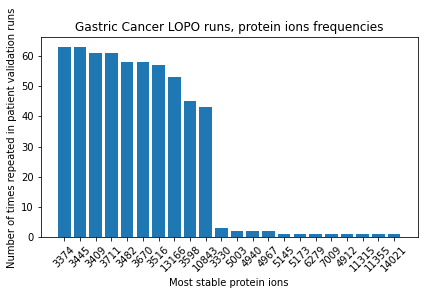

In [43]:
fig = plt.figure()
plt.xticks(rotation=45)
plt.bar(range(len(selected_counts)),selected_counts,tick_label = selected_unique_values)
plt.title("Gastric Cancer LOPO runs, protein ions frequencies")
plt.ylabel("Number of times repeated in patient validation runs")
plt.xlabel("Most stable protein ions")
plt.tight_layout()

In [44]:
above_80per_idx = [ ]
for i in range(len(counts)):
    if counts[i] >= int(63*0.8):
        above_80per_idx.append(i)

print("Most stable protein ions:" , unique_values[above_80per_idx])
print("Frequency of protein ions apperance:" , counts[above_80per_idx])

Most stable protein ions: [ 3374  3445  3409  3711  3482  3670  3516 13166]
Frequency of protein ions apperance: [63 63 61 61 58 58 57 53]


In [45]:
predictions_poor = [ ]
poor_status_idx = [ ]
print("Accuracy if we consider patients with ground truth 0, aka unknown or alive, can also be moderate:")
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "Poor") and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if ( GastricResults["Predicted Survivability"][i] == "High" or GastricResults["Predicted Survivability"][i] == "Moderate" ) and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Accuracy if we consider patients with ground truth 0, aka unknown or alive, can also be moderate:
Poor Survivability Classification approximate accuracy:  21.74
High Survivability Classification approximate accuracy:  87.5
Overall Classification approximate accuracy:  63.49


In [46]:
print(high_classifications[1][1] , "out of" , len(high_status_idx))
print(poor_classifications[1][1] , "out of" , len(poor_status_idx))

35 out of 40
5 out of 23


In [47]:
predictions_poor = [ ]
poor_status_idx = [ ]
print("Accuracy if we consider patients with ground truth 1, aka dead, can also be moderate:")
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "Poor" or GastricResults["Predicted Survivability"][i] == "Moderate" ) and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if GastricResults["Predicted Survivability"][i] == "High"  and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Accuracy if we consider patients with ground truth 1, aka dead, can also be moderate:
Poor Survivability Classification approximate accuracy:  69.57
High Survivability Classification approximate accuracy:  40.0
Overall Classification approximate accuracy:  50.79


In [48]:
predictions_poor = [ ]
poor_status_idx = [ ]
print("Accuracy if we consider moderate as correct in all cases")
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "Poor" or GastricResults["Predicted Survivability"][i] == "Moderate" ) and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "High" or GastricResults["Predicted Survivability"][i] == "Moderate" )  and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Accuracy if we consider moderate as correct in all cases
Poor Survivability Classification approximate accuracy:  69.57
High Survivability Classification approximate accuracy:  87.5
Overall Classification approximate accuracy:  80.95


In [49]:
predictions_poor = [ ]
poor_status_idx = [ ]
print("Accuracy if we only consider Poor and High as 0 and 1 only")
for i in range(len(GastricResults)):
    if GastricResults["Predicted Survivability"][i] == "Poor"  and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if GastricResults["Predicted Survivability"][i] == "High"  and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Accuracy if we only consider Poor and High as 0 and 1 only
Poor Survivability Classification approximate accuracy:  21.74
High Survivability Classification approximate accuracy:  40.0
Overall Classification approximate accuracy:  33.33


In [50]:
print("{} out of {} dead patients were predicted completely right".format(poor_classifications[1][1],len(poor_status_idx)))
print("{} out of {} unknown/alive patients were predicted completely right".format(high_classifications[1][1],len(high_status_idx)))

5 out of 23 dead patients were predicted completely right
16 out of 40 unknown/alive patients were predicted completely right


In [51]:
predictions_poor = [ ]
poor_status_idx = [ ]
print("Accuracy if we consider patients with ground truth 0, aka unknown or alive, can also be moderate:")
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "Poor") and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if ( GastricResults["Predicted Survivability"][i] == "High" or GastricResults["Predicted Survivability"][i] == "Moderate" ) and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Accuracy if we consider patients with ground truth 0, aka unknown or alive, can also be moderate:
Poor Survivability Classification approximate accuracy:  21.74
High Survivability Classification approximate accuracy:  87.5
Overall Classification approximate accuracy:  63.49


In [52]:
print("{} out of {} dead patients were predicted completely right".format(poor_classifications[1][1],len(poor_status_idx)))
print("{} out of {} unknown/alive patients were predicted right (considering moderate as unknown/alive)".format(high_classifications[1][1],len(high_status_idx)))

5 out of 23 dead patients were predicted completely right
35 out of 40 unknown/alive patients were predicted right (considering moderate as unknown/alive)
